# Learning essential graphs

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
from pylab import *
import matplotlib.pyplot as plt

import os

import pyagrum as gum
import pyagrum.lib.notebook as gnb



### Compare learning algorithms
Essentially MIIC computes the essential graph (CPDAG) from data. Essential graphs are PDAGs (Partially Directed Acyclic Graphs).

In [2]:
learner=gum.BNLearner("res/sample_asia.csv")
learner.useMIIC()
learner.useNMLCorrection()
print(learner)

Filename       : res/sample_asia.csv
Size           : (50000,8)
Variables      : visit_to_Asia[2], lung_cancer[2], tuberculosis[2], bronchitis[2], positive_XraY[2], smoking[2], tuberculos_or_cancer[2], dyspnoea[2]
Induced types  : True
Missing values : False
Algorithm      : MIIC
Correction     : NML
Prior          : -



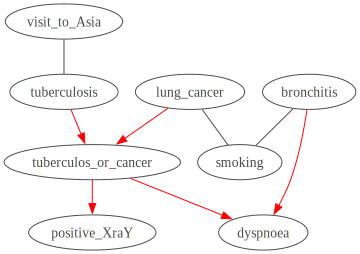

In [3]:
gemiic=learner.learnEssentialGraph()
gnb.show(gemiic)

For the others methods, it is possible to obtain the essential graph from the learned BN.

In [4]:
learner=gum.BNLearner("res/sample_asia.csv")
learner.useGreedyHillClimbing()
bnHC=learner.learnBN()
print(learner)
geHC=gum.EssentialGraph(bnHC)
geHC
gnb.sideBySide(bnHC,geHC)

Filename       : res/sample_asia.csv
Size           : (50000,8)
Variables      : visit_to_Asia[2], lung_cancer[2], tuberculosis[2], bronchitis[2], positive_XraY[2], smoking[2], tuberculos_or_cancer[2], dyspnoea[2]
Induced types  : True
Missing values : False
Algorithm      : Greedy Hill Climbing
Score          : BDeu
Prior          : -



In [5]:
learner=gum.BNLearner("res/sample_asia.csv")
learner.useLocalSearchWithTabuList()
print(learner)
bnTL=learner.learnBN()
geTL=gum.EssentialGraph(bnTL)
geTL
gnb.sideBySide(bnTL,geTL)

Filename       : res/sample_asia.csv
Size           : (50000,8)
Variables      : visit_to_Asia[2], lung_cancer[2], tuberculosis[2], bronchitis[2], positive_XraY[2], smoking[2], tuberculos_or_cancer[2], dyspnoea[2]
Induced types  : True
Missing values : False
Algorithm      : Local Search with Tabu List
Tabu list size : 2
Score          : BDeu
Prior          : -



Hence we can compare the 4 algorithms.

In [6]:
(
  gnb.flow.clear()
  .add(gemiic,"Essential graph from miic")
  .add(bnHC,"BayesNet from GHC")
  .add(geHC,"Essential graph from GHC")
  .add(bnTL,"BayesNet from TabuList")
  .add(geTL,"Essential graph from TabuList")
  .display()
)